## Solar Radiation

In [116]:
import pandas as pd
import cdsapi
from platform import python_version
print("python version: %s"%python_version())
print("pandas version: %s"%pd.__version__)

python version: 3.7.4
pandas version: 0.25.1


In [117]:
c = cdsapi.Client()

c.retrieve(
    'cams-solar-radiation-timeseries',
    {
        'sky_type': 'observed_cloud',
        'location': {
            'latitude': 49.61,
            'longitude': 6.13,
        },
        'altitude': '-999.',
        'date': '2020-06-01/2020-06-30',
        'time_step': '1hour',
        'time_reference': 'universal_time',
        'format': 'csv',
    },
    'download.csv')

2020-10-03 00:04:19,041 INFO Welcome to the CDS
2020-10-03 00:04:19,044 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-solar-radiation-timeseries
2020-10-03 00:04:19,818 INFO Request is queued
2020-10-03 00:04:20,857 INFO Request is completed
2020-10-03 00:04:20,862 INFO Downloading http://136.156.132.28/cache-compute-0000/cache/data7/adaptor.cams_solar_rad2.retrieve-1601281712.8821702-5958-19-db32433c-d0d7-44a9-a3a8-608f0ce43056.csv to download.csv (90.2K)
2020-10-03 00:04:21,168 INFO Download rate 298.3K/s


Result(content_length=92314,content_type=text/plain,location=http://136.156.132.28/cache-compute-0000/cache/data7/adaptor.cams_solar_rad2.retrieve-1601281712.8821702-5958-19-db32433c-d0d7-44a9-a3a8-608f0ce43056.csv)

In [118]:
solar_dataset = pd.read_csv("download.csv", sep=';', skiprows=42)
solar_dataset.columns

Index(['# Observation period', 'TOA', 'Clear sky GHI', 'Clear sky BHI',
       'Clear sky DHI', 'Clear sky BNI', 'GHI', 'BHI', 'DHI', 'BNI',
       'Reliability'],
      dtype='object')

In [119]:
solar_dataset[0:5]

,# Observation period,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability
0,2020-06-01T00:00:00.0/2020-06-01T01:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.00
1,2020-06-01T01:00:00.0/2020-06-01T02:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.00
2,2020-06-01T02:00:00.0/2020-06-01T03:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.00
3,2020-06-01T03:00:00.0/2020-06-01T04:00:00.0,11.0503,3.0468,0.5044,2.5424,12.9068,2.9508,0.4751,2.4757,12.2718,0.85
4,2020-06-01T04:00:00.0/2020-06-01T05:00:00.0,163.2162,77.0855,40.1012,36.9843,290.3163,65.4990,28.4098,37.0892,176.8177,1.00


In [128]:
dates = solar_dataset['# Observation period']

In [129]:
dates_left = [date.split('/')[0] for date in dates]
dates_index = pd.to_datetime(dates_left)
dates_index[0:5]

DatetimeIndex(['2020-06-01 00:00:00', '2020-06-01 01:00:00',
               '2020-06-01 02:00:00', '2020-06-01 03:00:00',
               '2020-06-01 04:00:00'],
              dtype='datetime64[ns]', freq=None)

In [122]:
cs_ghi = solar_dataset['Clear sky GHI']
cs_ghi_ts = pd.Series(cs_ghi.values, index=dates_index)

In [123]:
cs_ghi_ts

2020-06-01 00:00:00     0.0000
2020-06-01 01:00:00     0.0000
2020-06-01 02:00:00     0.0000
2020-06-01 03:00:00     3.0468
2020-06-01 04:00:00    77.0855
                        ...   
2020-06-30 19:00:00    13.1264
2020-06-30 20:00:00     0.0000
2020-06-30 21:00:00     0.0000
2020-06-30 22:00:00     0.0000
2020-06-30 23:00:00     0.0000
Length: 720, dtype: float64

In [124]:
ghi = solar_dataset['GHI']
ghi_ts = pd.Series(ghi.values, index=dates_index)
ghi_ts

2020-06-01 00:00:00     0.0000
2020-06-01 01:00:00     0.0000
2020-06-01 02:00:00     0.0000
2020-06-01 03:00:00     2.9508
2020-06-01 04:00:00    65.4990
                        ...   
2020-06-30 19:00:00     9.3217
2020-06-30 20:00:00     0.0000
2020-06-30 21:00:00     0.0000
2020-06-30 22:00:00     0.0000
2020-06-30 23:00:00     0.0000
Length: 720, dtype: float64

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

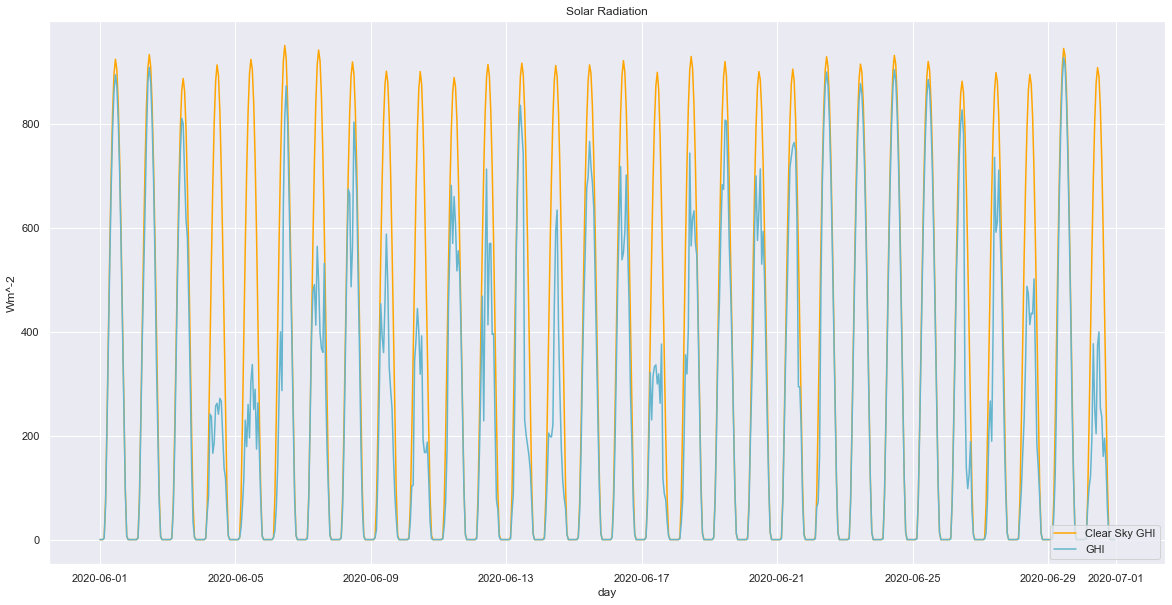

In [127]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("Solar Radiation")
ax.set_xlabel("day")
ax.set_ylabel("Wm^-2");
plt_cs_ghi = plt.plot(cs_ghi_ts, color='orange')
plt_ghi = plt.plot(ghi_ts, color='c')
plt.legend((plt_cs_ghi[0], plt_ghi[0]), ['Clear Sky GHI', 'GHI'], loc='lower right')